In [ ]:
# Danny Ma
# CAP5610
# Graduate
# 11/3/2022
# HW 4

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import operator
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV

In [3]:
##Bring in the dataset
regression = pd.read_csv('Cleaned_data.csv')
#converting data types just in case
regression.convert_dtypes().dtypes
print(regression)

         y        x1
0   0.8116 -6.860121
1   0.9072 -4.324130
2   0.9052 -4.358625
3   0.9039 -4.358427
4   0.8053 -6.955852
..     ...       ...
77  0.8964 -5.132415
78  0.8963 -4.811353
79  0.9074 -4.098269
80  0.9119 -3.661743
81  0.9228 -3.264401

[82 rows x 2 columns]


0.0031380594449992505
0.996679564960566


Text(0.75, 0.05, 'RMSE: 0.0031\nR^2: 0.9967')

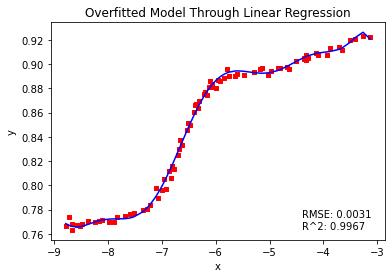

In [22]:
#Lets bring in the X variables and Y variables to their respectives areas; We want to convert them to numpy arrays because
#linear regression runs better with it.
x = regression[['x1']]
x = x.to_numpy()
y = regression[['y']]
y = y.to_numpy()

#The polynomial features package lets us easily apply powers 2-10 onto our X Variable. We tell it that we want to go up to a degree of 10
#Store fit_transform into a variable
polynomial_features= PolynomialFeatures(degree = 10)
# degree=10
x_poly = polynomial_features.fit_transform(x)

#Setting up the LinearRegression Model; fitting the model with Linear Regression; Doing our linear regression prediction
model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

#Calculating our RMeanSquared and our R^2. The higher the R^2 value is the "better" the model is. And the lower the RMeanSquared
#value is the "better". The better is in quotes because we obviously want good scores, but near perfect scores could also mean
#that we are overfitting the data. Which was the point of this assignment
rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print(rmse)
print(r2)


#We are going to plot out figure now. We have to make sure we are sorting the data or else we will get a line for each iteration of X
#The third and fourth line of code will supply us with that sort
plt.scatter(x, y, s=10, color = 'r', marker = 's')
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='b')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Overfitted Model Through Linear Regression')
plt.annotate('RMSE: ' + str(round(rmse, 4)) + '\nR^2: ' + str(round(r2, 4)), xy=(0.75, 0.05), xycoords='axes fraction')

0.01698432635449359
0.9027321518576257
[ 0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  6.13100736e-09  6.50288834e-10]


C:\Users\Danny\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0013612404502430162, tolerance: 2.4318747121951223e-05
  model = cd_fast.enet_coordinate_descent(


Text(0.55, 0.05, 'Optimal Alpha:27960.1848\nRMSE: 0.017\nR^2: 0.9027')

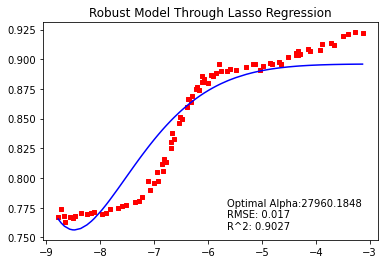

In [32]:
#Lets bring in the X variables and Y variables to their respectives areas; We want to convert them to numpy arrays because
#linear regression runs better with it.
x = regression[['x1']]
x = x.to_numpy()
y = regression[['y']]
# y = y.to_numpy()
#The polynomial features package lets us easily apply powers 2-10 onto our X Variable. We tell it that we want to go up to a degree of 10
#Store fit_transform into a variable
polynomial_features= PolynomialFeatures(degree=10)
x_poly = polynomial_features.fit_transform(x)

#Setting up the Lasso Regression Model; The idea of Lasso is when we increase our alpha, the more coefficients will be cut off.
#This will usually lead to an underfitted model or even a more robust model which is our goal.
lasso = Lasso(alpha=27960.184752103934)
optimal = 27960.184752103934
lasso.fit(x_poly, y)
lasso_pred = lasso.predict(x_poly)

#Calculating our RMeanSquared and our R^2. The higher the R^2 value is the "better" the model is. And the lower the RMeanSquared
#value is the "better". The better is in quotes because we obviously want good scores, but near perfect scores could also mean
#that we are overfitting the data. Which was the point of this assignment
lasso_rmse = np.sqrt(mean_squared_error(y,lasso_pred))
lasso_r2 = r2_score(y,lasso_pred)
print(lasso_rmse)
print(lasso_r2)
print(lasso.coef_)


plt.scatter(x, y, s=10, color = 'r', marker = 's')
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,lasso_pred), key=sort_axis)
x, lasso_pred = zip(*sorted_zip)
plt.plot(x, lasso_pred, color = 'b')
plt.title('Robust Model Through Lasso Regression')
plt.annotate('Optimal Alpha:' + str(round(optimal, 4)) + '\nRMSE: ' + str(round(lasso_rmse, 4)) + '\nR^2: ' + str(round(lasso_r2, 4)), 
             xy=(0.55, 0.05), xycoords='axes fraction')

In [216]:
#This is an extra step I decided to take on my own. We are using the Lasso Cross validation package to help us find the best value
#for alpha. 
lassovalidation = LassoCV(cv=5, random_state=0, max_iter=10000)

lassovalidation.fit(x_poly, y.values.ravel())

LassoCV(cv=5, max_iter=10000, random_state=0)

In [217]:
#As you can see our best value for alpha is listed below.
lassovalidation.alpha_

27960.184752103934